In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [84]:
# The data used in this file is in the excel file in the zip folder called 'final_data.csv'
data = pd.read_csv('final_data.csv')

In [85]:
data.head()

,image,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 780,Pixel 781,Pixel 782,Pixel 783,Pixel 784,Age,anatom_site_general,Gender,female_encoded,Target
0,ISIC_0000000,186,196,203,207,206,205,204,204,204,...,215,217,217,219,218,55,anterior torso,female,1,2
1,ISIC_0000001,144,155,168,173,175,174,173,175,173,...,180,181,181,180,180,30,anterior torso,female,1,2
2,ISIC_0000002,16,8,25,76,120,151,165,177,182,...,188,177,153,114,66,60,upper extremity,female,1,1
3,ISIC_0000003,223,220,218,219,221,222,220,217,216,...,221,223,225,223,224,30,upper extremity,male,0,2
4,ISIC_0000004,12,7,7,7,7,7,7,7,7,...,7,7,7,6,12,80,posterior torso,male,0,1


In [6]:
# Get one hot encoding of meta data columns
one_hot = pd.get_dummies(data['anatom_site_general'])
# Drop original column as it is now encoded
data = data.drop('anatom_site_general',axis = 1)
# Join the encoded df
data = data.join(one_hot)

In [7]:
data.head()

,image,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Target,0,anterior torso,head/neck,lateral torso,lower extremity,oral/genital,palms/soles,posterior torso,upper extremity
0,ISIC_0000000,186,196,203,207,206,205,204,204,204,...,2,0,1,0,0,0,0,0,0,0
1,ISIC_0000001,144,155,168,173,175,174,173,175,173,...,2,0,1,0,0,0,0,0,0,0
2,ISIC_0000002,16,8,25,76,120,151,165,177,182,...,1,0,0,0,0,0,0,0,0,1
3,ISIC_0000003,223,220,218,219,221,222,220,217,216,...,2,0,0,0,0,0,0,0,0,1
4,ISIC_0000004,12,7,7,7,7,7,7,7,7,...,1,0,0,0,0,0,0,0,1,0


In [8]:
X=data.drop(['image','Target','Gender'], axis=1) # drop image_id, target column, and encoded column for X data
y= data['Target'] # take only the target data for y

In [9]:
# Create train and test data 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.3, random_state = 1)

In [10]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (17731, 795)
X_test dimension=  (7600, 795)
y_train dimension=  (17731,)
y_train dimension=  (7600,)


## Logistic Regression

In [11]:
# Initialize and fit model
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

C:\Users\mehra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

In [12]:
# Predict on test set
y_test_pred=lm.predict(X_test)

In [52]:
# Get balanced accuracy score 
logit_accuracy= balanced_accuracy_score(y_test, y_test_pred)*100
print('The accuracy with logistic regression is: ', round(logit_accuracy,3),'%' )

The accuracy with logistic regression is:  22.599 %


## Random Forest

In [73]:
# Initialize and fit model
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [74]:
# Get predictions on test set
y_test_pred_rf=rf.predict(X_test)

In [75]:
# rf_accuracy= rf.score(X_test, y_test)*100
# print('The accuracy with Random Forests is: ', round(rf_accuracy,3),'%' )

In [76]:
# Balanced accurcy on train set
y_train_pred_rf= rf.predict(X_train)
rf_train_accuracy= balanced_accuracy_score(y_train, y_train_pred_rf)*100
print('The train accuracy with Random Forests is: ', round(rf_train_accuracy,3),'%' )

The train accuracy with Random Forests is:  100.0 %


In [77]:
# balanced accuracy on test set
rf_accuracy=balanced_accuracy_score(y_test, y_test_pred_rf)*100
print('The test accuracy with Random Forests is: ', round(rf_accuracy,3),'%' )

The test accuracy with Random Forests is:  27.045 %


In [78]:
# Perform grid search and CV


from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [80]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf2_random.fit(X_train, y_train)

In [81]:
# Random Forest Confusion matrix
confusion_matrix(y_test, y_test_pred_rf)

array([[ 512,  729,   87,    4,   10,    0,    0,    0],
       [ 113, 3685,   80,    0,   11,    0,    0,    0],
       [  51,  408,  518,   10,   15,    0,    0,    0],
       [  17,   61,  113,   38,   13,    0,    0,    0],
       [  86,  462,  144,    8,  105,    0,    0,    1],
       [   6,   50,   17,    0,    0,    1,    0,    0],
       [   4,   60,    2,    0,    0,    0,    0,    0],
       [  16,   77,   71,    5,    7,    0,    0,    3]], dtype=int64)

C:\Users\mehra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


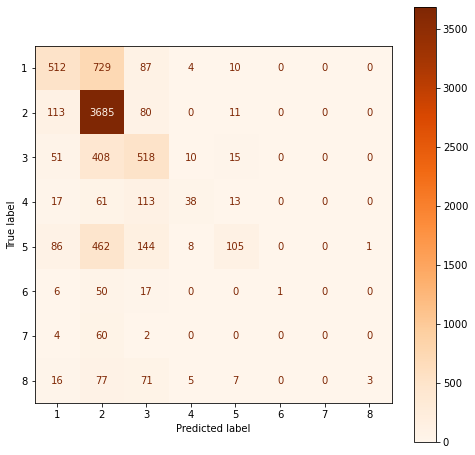

In [99]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(rf, X_test, y_test, cmap='Oranges', ax=ax)

In [82]:
# Random forest Classification report

result3 = classification_report(y_test, y_test_pred_rf)
print('Classification Report:')
print (result3)
result4 = balanced_accuracy_score(y_test,y_test_pred_rf)
print('Accuracy:',result4)

Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.38      0.48      1342
           2       0.67      0.95      0.78      3889
           3       0.50      0.52      0.51      1002
           4       0.58      0.16      0.25       242
           5       0.65      0.13      0.22       806
           6       1.00      0.01      0.03        74
           7       0.00      0.00      0.00        66
           8       0.75      0.02      0.03       179

    accuracy                           0.64      7600
   macro avg       0.60      0.27      0.29      7600
weighted avg       0.63      0.64      0.58      7600

Accuracy: 0.27045019740708864


C:\Users\mehra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mehra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mehra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forests has perfomed better than Logistic regression, giving us a balanced accuracy of 27%.

## kNN

In [68]:
# Initialize and fit model
knn=KNeighborsClassifier(8) # fitting model with the best value of k found below in cross validation
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [69]:
# Get predictions on test set
y_test_pred_knn=knn.predict(X_test)

In [70]:
# Getting balanced acccuracy with best value of k
knn_accuracy=balanced_accuracy_score(y_test, y_test_pred_knn)
print('The accuracy with kNN is: ', round(knn_accuracy*100,3),'%' )

The accuracy with kNN is:  23.243 %


In [45]:
# metrics with best value of k
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_test_pred_knn)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_test_pred_knn)
print('Classification Report:')
print (result1)
result2 = accuracy_score(y_test,y_test_pred_knn)
print('Accuracy:',result2)

Confusion Matrix:
[[ 254  824  192   24   42    3    0    3]
 [ 104 3475  240   23   39    4    0    4]
 [  34  406  515   21   24    0    1    1]
 [  12   80  106   27   16    0    0    1]
 [  39  485  178   11   91    1    0    1]
 [   4   41   20    2    5    2    0    0]
 [   0   55    9    0    2    0    0    0]
 [   7   88   66    9    7    0    0    2]]
Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.19      0.28      1342
           2       0.64      0.89      0.74      3889
           3       0.39      0.51      0.44      1002
           4       0.23      0.11      0.15       242
           5       0.40      0.11      0.18       806
           6       0.20      0.03      0.05        74
           7       0.00      0.00      0.00        66
           8       0.17      0.01      0.02       179

    accuracy                           0.57      7600
   macro avg       0.32      0.23      0.23      7600
weighted avg      

C:\Users\mehra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


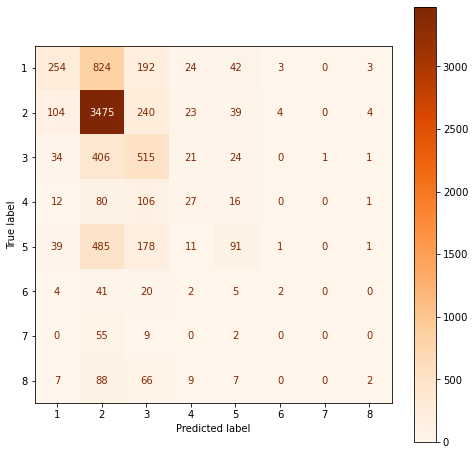

In [98]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(knn, X_test, y_test, cmap='Oranges', ax=ax)

#### Cross- Validation

In [61]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=8) #
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.46477205 0.58349783 0.6058034  0.54283458 0.49842084]
cv_scores mean:0.5390657413322357


#### GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [72]:
#check top performing n_neighbors value
print('Best value of k: ',knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
print('Mean accuracy: ',knn_gscv.best_score_)

Best value of k:  {'n_neighbors': 8}
Mean accuracy:  0.5390657413322357


Based on all of the above data, we can see that the best k value for kNN is 8 and we get a blanced accuracy of 23.24%.
Clearly, Random Forest has performed the best giving us the balanced accuracy score of 27%.
Despite the complexity of the problem, having an accuracy of 27% is not acceptable, especially in the medical field. To further our analysis and in an attempt to gain higher accuracy, we have applied the CNN model Xception. Our results can be seen in the skin_lesion_classification_Xception.ipynb file.